In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


Посмотрим какие есть колонки в датасете и есть ли пропущенные значения

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Мы видим, что в столбце battery_power имеются пропущенные значения, теперь посмотрим на общие статистики

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Посмотрим на распределение классификации стоимости телефонов

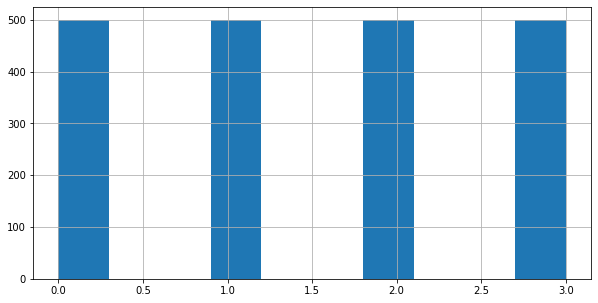

In [ ]:
df['price_range'].hist(figsize = (10, 5))

Как  мы видим, классы сбалансированны, теперь ототбразим Boxplot'ы для каждой из колонок

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Посмотрим на распределение значений некоторых из колонок

In [10]:
cols = ['clock_speed','dual_sim', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


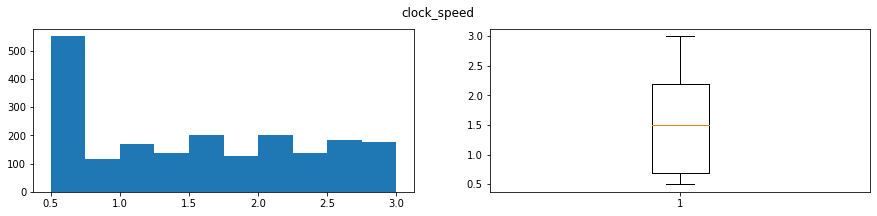

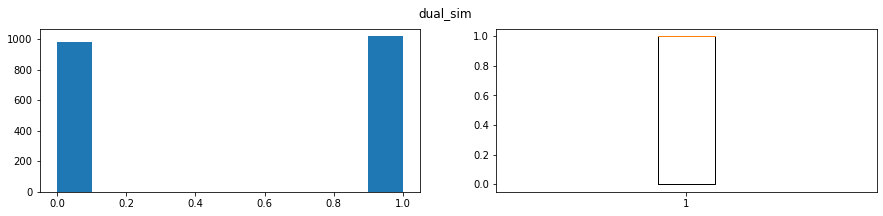

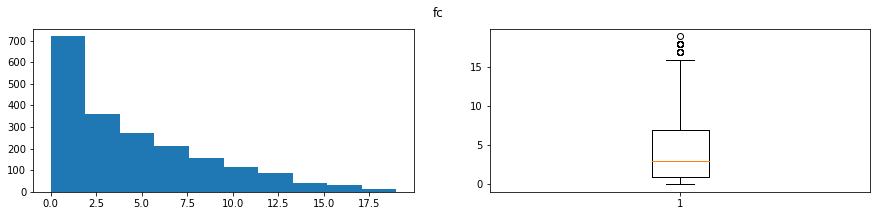

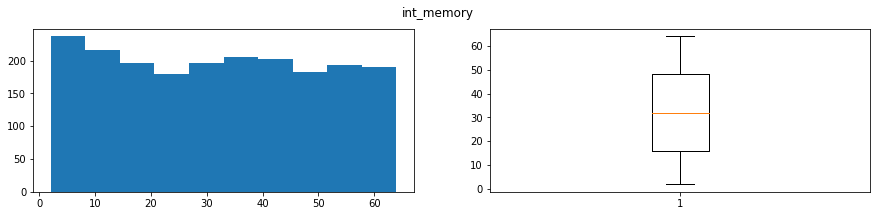

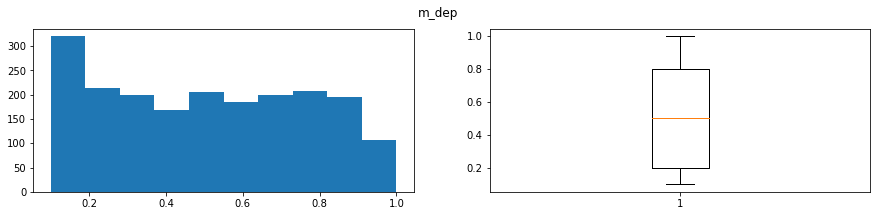

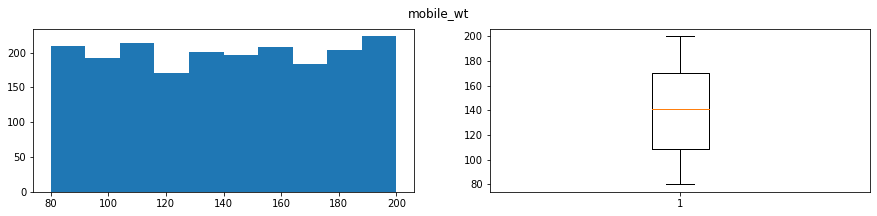

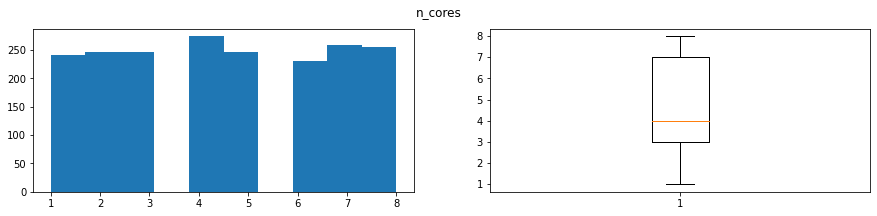

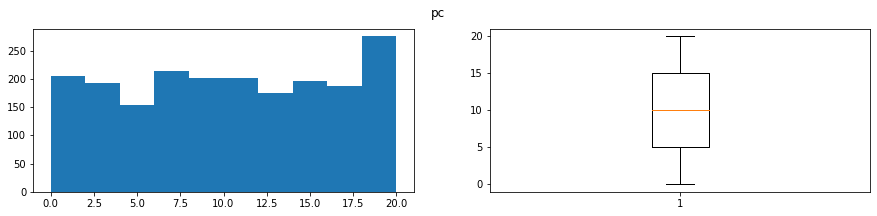

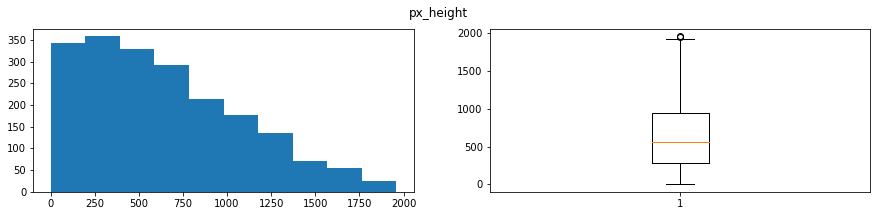

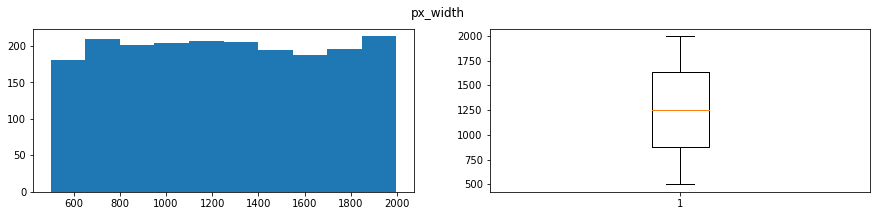

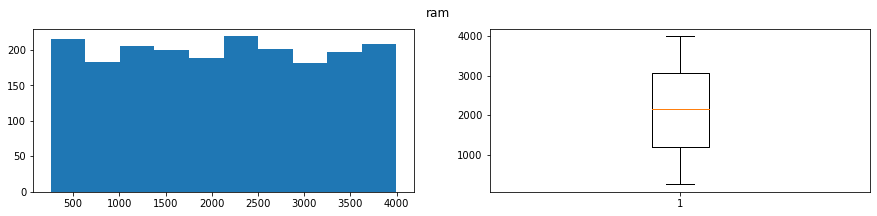

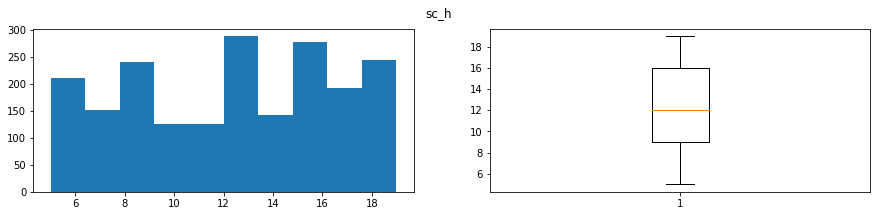

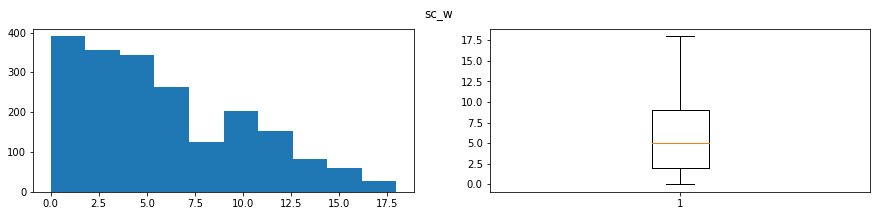

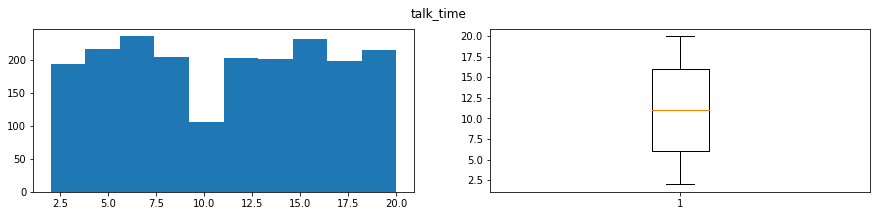

In [11]:
for col in cols:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(col)
    ax1.hist(df[col])
    ax2.boxplot(df[col])
    fig.set_figheight(3)
    fig.set_figwidth(15)
    plt.show()

Boxplot для колонки fc (разрешение камеры) показывает выборсы, однако на самом деле это не выбросы, т.к. существуют камеры с разрешение 19 мегапикселей, однако их на момент сбора данных было крайне мало (ниже ещё раз приведён график)

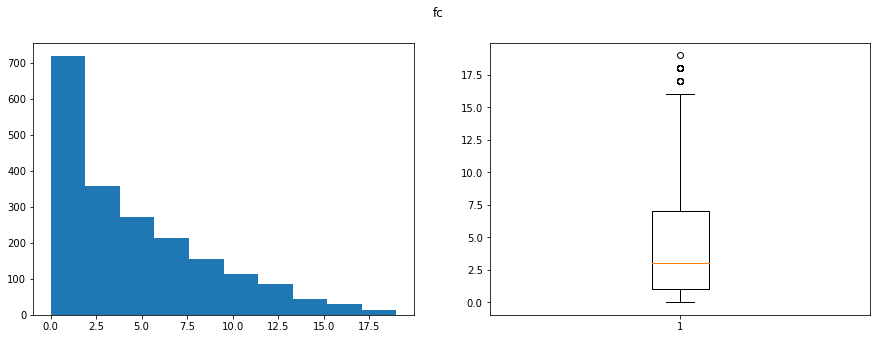

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('fc')
ax1.hist(df['fc'])
ax2.boxplot(df['fc'])
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

Из имеющихся колонок можно получить новые признаки, например из длины и ширины в пикселях можно получить площадь экрана

In [13]:
df['area'] = df['px_height'] * df['px_width']
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,area
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1464096


In [16]:
y = df['price_range']
X = df.drop('price_range', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Теперь займёмся пропущенными значениями

In [17]:
df.groupby('blue').mean()['battery_power']

blue
0    1233.624752
1    1243.511111
Name: battery_power, dtype: float64

In [18]:
df.groupby('dual_sim').mean()['battery_power']

dual_sim
0    1257.254842
1    1220.480864
Name: battery_power, dtype: float64

In [19]:
df.groupby('four_g').mean()['battery_power']

four_g
0    1231.334378
1    1245.110259
Name: battery_power, dtype: float64

In [20]:
df.groupby('three_g').mean()['battery_power']

three_g
0    1229.473795
1    1241.351280
Name: battery_power, dtype: float64

In [21]:
df.groupby('touch_screen').mean()['battery_power']

touch_screen
0    1243.165996
1    1233.926441
Name: battery_power, dtype: float64

In [22]:
df.groupby('wifi').mean()['battery_power']

wifi
0    1242.235294
1    1234.904339
Name: battery_power, dtype: float64

Наибольшая разница в средних значениях наблюдается при группировке по dual_sim (наличие двух SIM-карт)

In [23]:
X_train['battery_power'] = X_train.groupby('dual_sim')['battery_power'].apply(lambda x:x.fillna(x.mean()))
X_test['battery_power'] = X_test.groupby('dual_sim')['battery_power'].apply(lambda x:x.fillna(x.mean()))

Теперь можем переходить к обучению модели

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
model = RandomForestClassifier(random_state = 42)

param_grid = { 
    'n_estimators': [200, 500, -50,100,150,300,500,700,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

Теперь узнаем лучшие параметры для случайного леса

In [ ]:
CV_rfc.best_params_

Теперь создаём модель с такими параметрами

In [ ]:
model1 = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto', n_estimators = 200)
model1.fit(X_train, y_train)

In [ ]:
model1.predict(X_test)

In [ ]:
y_test.values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_score(model1.predict(X_test), y_test)

In [ ]:
f1_score(model1.predict(X_test), y_test, average = 'macro')